# To explore Business Analytics.

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("SampleSuperstore.csv")
print("Importing SuperStore Data!")
df

Importing SuperStore Data!


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.shape

(9994, 13)

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Finding null value or error in data and solve it.

In [6]:
pd.DataFrame(df.isnull().sum(), columns=['Number of missing vlaues'])

,Number of missing vlaues
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


# According to the above table we can see that there is no null value or error in the data.

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


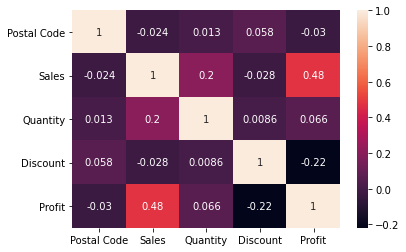

In [9]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

# As we see the correlation in 'Sales and Profit' and 'Sales and Quantity' is major, so now we analyse the data.

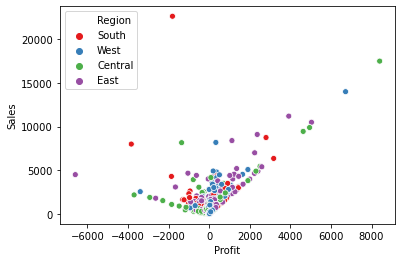

In [13]:
sns.scatterplot(df['Profit'], df['Sales'], hue=df['Region'], palette='Set1')

In [14]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

# The above data tells Demand by Region.

In [16]:
df['Quantity'].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

# The above data tells Maximum Demanding Quantity.


# Now let's make graph between 'Sales and Quantity'.

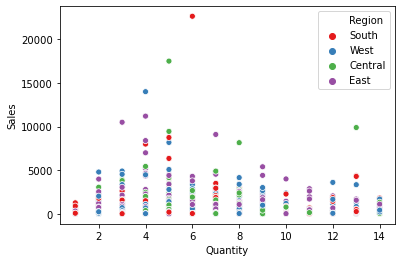

In [17]:
sns.scatterplot(df['Quantity'], df['Sales'], hue=df['Region'], palette="Set1")

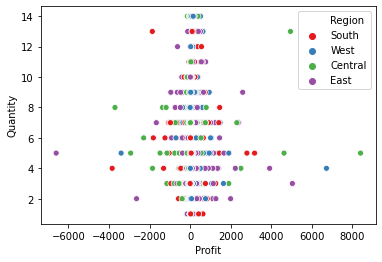

In [18]:
sns.scatterplot(df['Profit'], df['Quantity'], hue=df['Region'], palette="Set1")

# As we see in the above graph that no profit in Quantity 1 to 8.

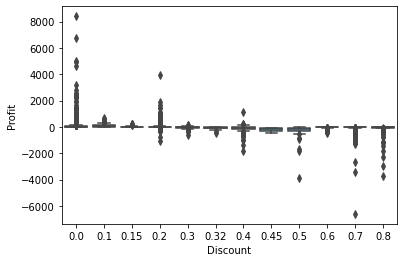

In [19]:
sns.boxplot('Discount','Profit',data=df)

# As we see in the above graph that no profit in company when discount is above 40%.

In [22]:
t=pd.DataFrame(np.percentile(df['Profit'],[20,40,60,80,90,99.5],axis=0)).transpose()
t.columns=['Percent_20','Pencent_40','Percent_60','Percent_80','Percent_90','Percent_99.5']
t

,Percent_20,Pencent_40,Percent_60,Percent_80,Percent_90,Percent_99.5
0,0.40032,5.4432,13.4913,41.0388,89.28162,843.1706


In [24]:
GP1=df.groupby(['Region']).Profit.mean().reset_index()
GP1

,Region,Profit
0,Central,17.092709
1,East,32.135808
2,South,28.857673
3,West,33.849032


In [26]:
GP1.sort_values("Profit", axis = 0, ascending = False, 
                 inplace = True, na_position ='first') 
GP_1=GP1.reset_index()
GP_1.drop(['index'], axis = 1)

,Region,Profit
0,West,33.849032
1,East,32.135808
2,South,28.857673
3,Central,17.092709


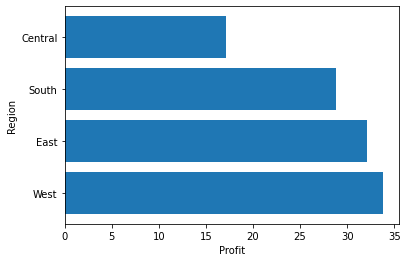

In [27]:
import matplotlib.pyplot as plt
plt.barh(GP_1['Region'], GP_1['Profit'])
plt.xlabel('Profit')
plt.ylabel('Region')
plt.show()

# From the above graph we see that Central Region is having less Profit, So we need to improve it.

In [28]:
GP2=df.groupby(['Quantity']).Profit.mean().reset_index()
GP2

,Quantity,Profit
0,1,8.276396
1,2,16.006831
2,3,23.667715
3,4,37.131310
4,5,40.257394
5,6,18.051517
6,7,56.579163
7,8,42.244342
8,9,68.557716
9,10,35.862404


In [29]:
GP2.sort_values("Profit", axis = 0, ascending = False, 
                 inplace = True, na_position ='first') 
GP_2=GP2.reset_index()
GP_2.drop(['index'], axis = 1)

,Quantity,Profit
0,13,235.144481
1,11,126.275503
2,14,93.931166
3,9,68.557716
4,7,56.579163
5,12,51.524609
6,8,42.244342
7,5,40.257394
8,4,37.131310
9,10,35.862404


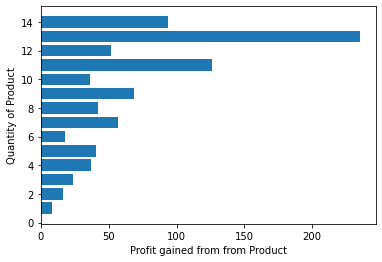

In [30]:
plt.barh(GP_2['Quantity'],GP_2['Profit'])
plt.xlabel('Profit gained from from Product')
plt.ylabel('Quantity of Product')
plt.show()

In [31]:
GP3=df.groupby(['State']).Profit.mean().reset_index()
GP3

,State,Profit
0,Alabama,94.865989
1,Arizona,-15.303235
2,Arkansas,66.811452
3,California,38.171608
4,Colorado,-35.867351
5,Connecticut,42.823071
6,Delaware,103.930988
7,District of Columbia,105.958930
8,Florida,-8.875461
9,Georgia,88.315453


In [32]:
#Arrangeing it in ascending order
GP3.sort_values("Profit", axis = 0, ascending = False, 
                 inplace = True, na_position ='first') 
GP_3=GP3.reset_index()
GP_3.drop(['index'], axis = 1)

,State,Profit
0,Vermont,204.088936
1,Rhode Island,130.100523
2,Indiana,123.375411
3,Montana,122.221900
4,Minnesota,121.608847
5,District of Columbia,105.958930
6,Delaware,103.930988
7,Wyoming,100.196000
8,Missouri,97.518341
9,Michigan,95.934069


# From the above table we can see that from serial number 39 to 48, these city companies faces maximum loss.

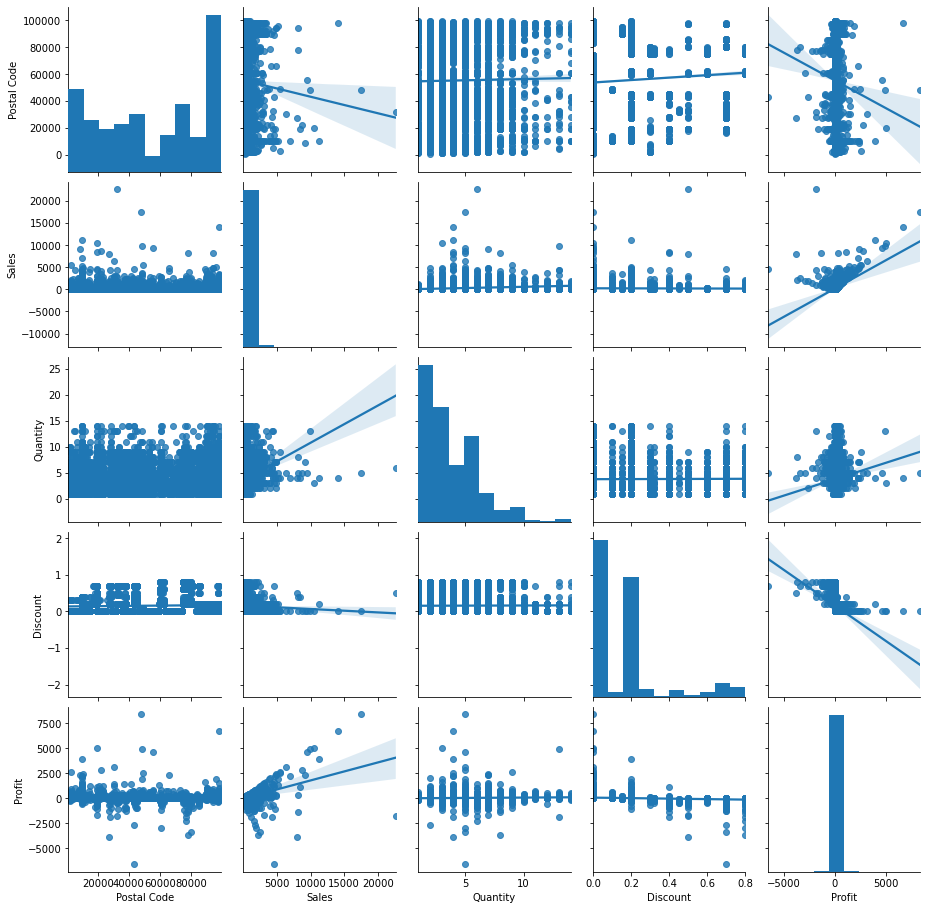

In [33]:
sns.pairplot(df, kind="reg")
plt.show()

In [34]:
GP=df.groupby(['Country','State','City','Postal Code','Segment','Region','Category','Sub-Category'])
GP.first()

Ship Mode  \
Country       State     City       Postal Code Segment     Region  Category        Sub-Category                   
United States Alabama   Auburn     36830       Consumer    South   Furniture       Chairs        Standard Class   
                                                                   Office Supplies Envelopes       Second Class   
                                                                                   Labels          Second Class   
                                                                                   Paper         Standard Class   
                                                                                   Storage       Standard Class   
...                                                                                                         ...   
              Wisconsin Wausau     54401       Consumer    Central Office Supplies Binders       Standard Class   
                                                                                   Storage       Standard Class   
                        West Allis 53214       Corporate   Central Furniture       Bookcases       Second Class   
                                                                   Office Supplies Binders         Second Class   
              Wyoming   Cheyenne   82001       Home Office West    Furniture       Chairs        Standard Class   

                                                                                                    Sales  \
Country       State     City       Postal Code Segment     Region  Category        Sub-Category             
United States Alabama   Auburn     36830       Consumer    South   Furniture       Chairs         350.980   
                                                                   Office Supplies Envelopes        7.380   
                                                                                   Labels         491.550   
                                                                                   Paper           13.080   
                                                                                   Storage        900.080   
...                                                                                                   ...   
              Wisconsin Wausau     54401       Consumer    Central Office Supplies Binders         12.390   
                                                                                   Storage         36.630   
                        West Allis 53214       Corporate   Central Furniture       Bookcases      241.960   
                                                                   Office Supplies Binders          8.520   
              Wyoming   Cheyenne   82001       Home Office West    Furniture       Chairs        1603.136   

                                                                                                 Quantity  \
Country       State     City       Postal Code Segment     Region  Category        Sub-Category             
United States Alabama   Auburn     36830       Consumer    South   Furniture       Chairs               1   
                                                                   Office Supplies Envelopes            2   
                                                                                   Labels               5   
                                                                                   Paper                2   
                                                                                   Storage              4   
...                                                                                                   ...   
              Wisconsin Wausau     54401       Consumer    Central Office Supplies Binders              3   
                                                                                   Storage              3   
                        West Allis 53214       Corporate   Central Furniture       Bookcases      

# The above data shown helps to understand all the data in simple way by 'groupby()' method.